## Part III: Machine Learning

### 1.Preprocessing

#### Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
business_file = '../project_data/yelp_business.csv'
review_file = '../project_data/yelp_review.csv'

# business_file = '../project_data/yelp_business.csv'
# review_file = 'yelp_review.csv'

# Load the business data and review data
business_df = pd.read_csv(business_file)
review_df = pd.read_csv(review_file)

#### Handle Missing Values

**Dropping Missing Values in Data**:
   - Rows in `business_df` with missing values in the `categories` column were dropped.
   - Rows in `review_df` with missing values in the `text` column were dropped
   - This step ensures that all businesses have valid category information, which is essential for filtering later.

In [30]:
business_df = business_df.dropna(subset=['categories'])
review_df = review_df.dropna(subset=['text'])
review_df = review_df.sample(frac=0.01, random_state=42)
print(business_df.isnull().sum())
print(review_df.isnull().sum())
print('After dropping NA: business data :', business_df.shape)
print('After dropping NA: review data :', review_df.shape)

business_id         0
name                0
address          5126
city                0
state               0
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13642
categories          0
hours           23120
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64
After dropping NA: business data : (150243, 14)
After dropping NA: review data : (699, 9)


**Filtering for Restaurants**:
- Filtered businesses with "Restaurants" in their `categories` column into `restaurant_df`.
- Retained reviews in `review_df` whose `business_id` matched `restaurant_df`.
- This ensures the dataset focuses only on restaurants.

In [ ]:
# Filter out businesses that are not restaurants
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants')]
restaurant_ids = restaurant_df['business_id'].values

# Filter out reviews that are not for restaurants
restaurant_review_df = review_df[review_df['business_id'].isin(restaurant_ids)]

print('Number of reviews for restaurants:', len(restaurant_review_df))
print(review_df.head())
print(business_df.head())

In [4]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69903 entries, 1295256 to 4428200
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    69903 non-null  object 
 1   user_id      69903 non-null  object 
 2   business_id  69903 non-null  object 
 3   stars        69903 non-null  float64
 4   useful       69903 non-null  int64  
 5   funny        69903 non-null  int64  
 6   cool         69903 non-null  int64  
 7   text         69903 non-null  object 
 8   date         69903 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.3+ MB


In [5]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150243 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150243 non-null  object 
 1   name          150243 non-null  object 
 2   address       145117 non-null  object 
 3   city          150243 non-null  object 
 4   state         150243 non-null  object 
 5   postal_code   150170 non-null  object 
 6   latitude      150243 non-null  float64
 7   longitude     150243 non-null  float64
 8   stars         150243 non-null  float64
 9   review_count  150243 non-null  int64  
 10  is_open       150243 non-null  int64  
 11  attributes    136601 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


**Merging Reviews and Businesses**:
- Merged `restaurant_review_df` and `restaurant_df` on `business_id` using an inner join.
- Renamed `stars_x` to `review_stars` and `stars_y` to `business_stars` for clarity.

In [6]:
merged_df = pd.merge(restaurant_review_df, restaurant_df, on='business_id', how='inner')
merged_df = merged_df.rename(columns={'stars_x': 'review_stars', 'stars_y': 'business_stars'})
merged_df.head()

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,business_stars,review_count,is_open,attributes,categories,hours
0,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2.0,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,Bru Burger Bar - Indianapolis,...,IN,46204,39.773307,-86.152091,4.0,1608,1,"{'BikeParking': 'True', 'GoodForKids': 'True',...","Restaurants, Gluten-Free, Bars, Food, Nightlif...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
1,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4.0,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,Joe's Seafood,...,PA,19403,40.139854,-75.387321,3.0,7,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Seafood Markets, Food, Restaurants, Seafood, S...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
2,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5.0,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,Rumbi Island Grill,...,ID,83709,43.604645,-116.289834,3.5,29,0,"{'HasTV': 'False', 'GoodForMeal': ""{'dessert':...","Sandwiches, Salad, Restaurants, Hawaiian, Cari...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
3,18E_haOfOm8ks-A7SlVWRg,bnDZpsii_if2_wpn8oPcig,bK0j7YtVyN98UnM_8fUONg,3.0,1,1,1,Dirt cheap happy hour specials. Half priced d...,2011-11-08 01:30:27,Tavern on Broad,...,PA,19102,39.949119,-75.164844,2.5,282,0,"{'NoiseLevel': ""u'very_loud'"", 'RestaurantsPri...","American (New), Bars, Sports Bars, Restaurants...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
4,xQVDB9xRdpLmPh9XMQ6Gvg,yy38DH7ENFTJ10-d4GUlig,S26FJcC298XNpN2cZiwOrA,5.0,0,0,0,Nothing beats pizza and beer in my book. This ...,2012-12-24 02:18:18,Pi Pizzeria - Central West End,...,MO,63108,38.648864,-90.260690,4.0,488,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


**Identifying Major Cuisine Types**:
- Extracted `major_cuisine` from `categories` based on predefined types (`Italian`, `Chinese`, `Mexican`, etc.).
- Retained only rows with identified `major_cuisine` in the filtered dataset.
- Focuses the analysis on specific cuisines of interest.

In [ ]:
# Define cuisine types of interest
cuisine_types = ["Italian", "Chinese", "Mexican", "Japanese", "American", "Indian"]

# Function to determine the major cuisine type
def get_major_cuisine(categories):
    for cuisine in cuisine_types:
        if cuisine.lower() in categories.lower():
            return cuisine
    return None  # Return None if no major cuisine is found

# Apply the function to replace categories with the major cuisine type
merged_df['major_cuisine'] = merged_df['categories'].apply(get_major_cuisine)

# Filter to include only rows where a major cuisine was identified
filtered_df = merged_df[merged_df['major_cuisine'].notna()]

# Display the updated DataFrame
print(filtered_df[['categories', 'major_cuisine']].head())

# Check the size of the filtered dataset
print(f"Number of entries with identified major cuisine types: {filtered_df.shape[0]}")

                                          categories major_cuisine
3  American (New), Bars, Sports Bars, Restaurants...      American
5                        American (New), Restaurants      American
7  Food, Sandwiches, American (Traditional), Rest...      American
8              Nightlife, Bars, Mexican, Restaurants       Mexican
9                               Italian, Restaurants       Italian
Number of entries with identified major cuisine types: 29037


#### Feature Scaling(Numeric)

- Scaled `review_count`, `review_stars`, and `business_stars` using Z-score standardization.
- Ensures features have a mean of 0 and a standard deviation of 1.
- Prepares the dataset for clustering and PCA by treating all features equally.

In [13]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_features = ['review_count', 'review_stars', 'business_stars']

# Standardization (Z-Score)
standard_scaler = StandardScaler()

# Using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, numerical_features] = standard_scaler.fit_transform(filtered_df[numerical_features])

# Display the scaled dataset
print(filtered_df[numerical_features].head())


   review_count  review_stars  business_stars
3     -0.278013     -0.557581       -2.126283
5      0.692693      0.883046        1.226557
7     -0.299224      0.162732       -1.288073
8     -0.344141     -1.998208       -0.449863
9     -0.564983     -1.277895       -0.449863


#### Feature Scaling(Categorical)

- Encoded `major_cuisine` into binary columns using `OneHotEncoder`.
- Used `sparse_output=False` to generate a dense array suitable for DataFrame conversion.
- Concatenated the encoded features with `filtered_df`.
- Dropped the original `major_cuisine` column after encoding.
- Prepares the categorical data for numerical analysis and machine learning models.

In [18]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select categorical columns to encode
categorical_features = ['major_cuisine']

# Create OneHotEncoder instance
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Set sparse=False to get a dense array

# Fit and transform the categorical features
encoded_features = one_hot_encoder.fit_transform(filtered_df[categorical_features])

# Convert encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
filtered_df = pd.concat([filtered_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop the original categorical column
filtered_df.drop(columns=categorical_features, inplace=True)

# Display the updated DataFrame
print(filtered_df.head())


                review_id                 user_id             business_id  \
0  18E_haOfOm8ks-A7SlVWRg  bnDZpsii_if2_wpn8oPcig  bK0j7YtVyN98UnM_8fUONg   
1  c7IQ5alG0pl9yCITtsIlrA  ZLKpeCqbCMWfNeT6yU8wUQ  zT2OzXDWKK1abapHs2RUrQ   
2  YHIicUo2zqA5zwe-lXhsNw  CEZMiWrgtF67m0GUm19ZJA  nKpWUL3kMt4cnNQhye2WqA   
3  3KFxmw4RG5E4ActnP8VPCQ  IOJnU62iJL1LM_X6A_p1xw  vtR2MjFToKkclbUX5DuhlQ   
4  tsCWBn7pc09M3jKiwi4w-g  2ULSyP0EK7LQaavU89efLA  eSJMA_VdUVQTDkRJiV9lHw   

   review_stars  useful  funny  cool  \
0     -0.557581       1      1     1   
1      0.883046       1      0     0   
2      0.162732       2      5     1   
3     -1.998208       6      1     0   
4     -1.277895       1      0     0   

                                                text                 date  \
0  Dirt cheap happy hour specials.  Half priced d...  2011-11-08 01:30:27   
1  Philly cheese steak (loaded)  was phenomenal. ...  2021-07-02 02:17:40   
2  It's almost 10 o clock on a Tuesday and I am t...  2015-04-22 

#### Dimensionality Reduction

- Selected scaled numerical features: `review_count`, `review_stars`, and `business_stars`.
- Included one-hot encoded categorical features: columns starting with `major_cuisine_`.
- Combined numerical and categorical features into a new DataFrame `features_df`.
- Prepares the data for dimensionality reduction techniques like PCA.

In [28]:
# Select scaled numerical features (already scaled)
numerical_features = ['review_count', 'review_stars', 'business_stars']

# Select one-hot encoded categorical features
categorical_features = [col for col in filtered_df.columns if col.startswith('major_cuisine_')]

# Combine scaled numerical features and one-hot encoded categorical features
selected_features = numerical_features + categorical_features
features_df = filtered_df[selected_features]

# Display the prepared DataFrame
print("Prepared Features for Dimensionality Reduction:")
print(features_df.head())
print(f"Shape of features_df: {features_df.shape}")

Prepared Features for Dimensionality Reduction:
   review_count  review_stars  business_stars  major_cuisine_American  \
0     -0.278013     -0.557581       -2.126283                     1.0   
1      0.692693      0.883046        1.226557                     1.0   
2     -0.299224      0.162732       -1.288073                     1.0   
3     -0.344141     -1.998208       -0.449863                     0.0   
4     -0.564983     -1.277895       -0.449863                     0.0   

   major_cuisine_Chinese  major_cuisine_Indian  major_cuisine_Italian  \
0                    0.0                   0.0                    0.0   
1                    0.0                   0.0                    0.0   
2                    0.0                   0.0                    0.0   
3                    0.0                   0.0                    0.0   
4                    0.0                   0.0                    1.0   

   major_cuisine_Japanese  major_cuisine_Mexican  
0                     0

#### Applying PCA and Visualizing Explained Variance:
- Applied PCA to the prepared `features_df` to analyze the explained variance of each principal component.
- Calculated the individual explained variance ratio and the cumulative explained variance.
- Visualized the results:
  - **Bar Plot**: Shows the individual explained variance for each component.
  - **Scatter Plot and Line**: Represent the cumulative explained variance, helping determine the number of components needed to capture most of the variance.
- Helps identify the optimal number of principal components for dimensionality reduction.


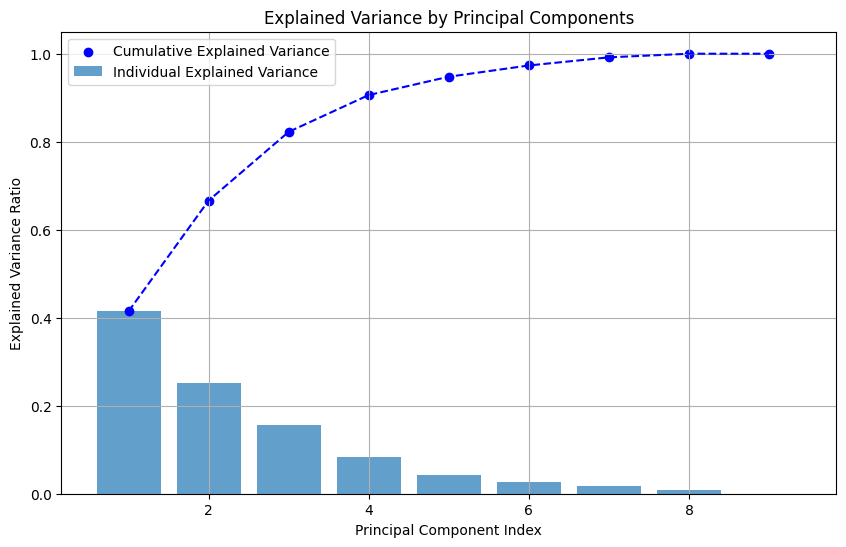

In [29]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA to determine explained variance
pca = PCA()  # Let PCA determine all components
pca.fit(features_df)

# Explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.scatter(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, label='Cumulative Explained Variance', color='blue')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, linestyle='--', color='blue')

# Add labels and title
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Choosing the Number of Principal Components:
- Based on the explained variance plot:
  - The first 4 components explain approximately 90% of the variance in the data.
  - Beyond 4 components, the cumulative variance increases minimally, indicating diminishing returns.
- **Decision**:
  - Retain 4 components for dimensionality reduction to capture the majority of the information while reducing noise and complexity.

In [31]:
pca = PCA(n_components=4)

# Fit and transform the data
reduced_features = pca.fit_transform(features_df)

# Create a DataFrame for the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(4)])

# Display the resulting DataFrame
print("Reduced Features with 4 Principal Components:")
print(reduced_df.head())

# Explained variance ratio for the 4 components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Reduced Features with 4 Principal Components:
        PC1       PC2       PC3       PC4
0 -1.866461  0.347373 -1.171291  0.454709
1  1.667680  0.086670  0.130245  0.484687
2 -0.878127 -0.118227 -1.009826  0.495922
3 -1.680273  0.648040  1.060819 -0.625506
4 -1.331947  0.098146  0.677053 -0.618968
Explained Variance Ratio: [0.41439299 0.25187133 0.1561148  0.08370339]
Cumulative Explained Variance: [0.41439299 0.66626433 0.82237913 0.90608252]


#### Results with 4 Principal Components

**Explained Variance Ratio**  
- **Definition**: The proportion of the total variance in the data explained by each principal component.
  - `PC1`: Explains **41.44%** of the variance.
  - `PC2`: Explains **25.19%** of the variance.
  - `PC3`: Explains **15.61%** of the variance.
  - `PC4`: Explains **8.37%** of the variance.

**Cumulative Explained Variance**
- **Definition**: The total variance explained when combining multiple components.
  - `PC1 + PC2`: Explain **66.63%** of the variance.
  - `PC1 + PC2 + PC3`: Explain **82.24%** of the variance.
  - `PC1 + PC2 + PC3 + PC4`: Explain **90.61%** of the variance.


**Significance**:
  - Retaining 4 principal components captures over **90% of the variance**, meaning most of the information in the dataset is preserved.
  - This reduction simplifies the dataset while minimizing information loss.  

**Application**:
  - The reduced features can now be used for clustering, classification, or other analyses, with a smaller, more manageable dataset.
